We import the drive to be able to obtain the directories in which the dataset finds itself in.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/Machine Learning/Datasets/Chess Data Set/Chessman-image-dataset/Chess"
!ls

/content/drive/MyDrive/Machine Learning/Datasets/Chess Data Set/Chessman-image-dataset/Chess
images	output


# Splitting Folders
We split the folders using the split-folders library, first installing it with pip, then specify parameters within the function.

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders

splitfolders.ratio('images', output = 'output',seed=1337,ratio=(0.7,0.10,0.20))

Copying files: 556 files [02:12,  4.19 files/s]


# Data Augmentation

We begin the data augmentation process with the help of tensorflow, in order to generate new images to RAM, we use it's Image Generator, to generate new images for the data Augmentation Process.
base_dir acts as our base directories to take the base images from to then augment, with train and test being the directories for our testing data and our training data, same with validation.

train_Datagen is the ImageGenerator, where we give it certrain parameters that alter the given images.

The imported libraries help with "plotting" the image, as well as management of files with os, and finally numpy for numerical operations.


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


base_dir = 'C:/Users/Alex/Documents/Cisco Config/Algorithms/Machine Learning/DataSet/Chess-20240529T055537Z-001/Chess/output'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'val')

train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 30,
							width_shift_range = 0.2,
							height_shift_range = 0.2,
							shear_range = 0.1,
							# zoom_range = 0.1,
							#brightness_range=[0.8, 1.2],  # Adjust brightness
   						#channel_shift_range=20,  # Adjust color channel shifts
    					#fill_mode='nearest',
							horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale=1./255)

The following code shows one image being modified, taking our train directory as it's base of generation.

Found 382 images belonging to 6 classes.


<Figure size 640x480 with 0 Axes>

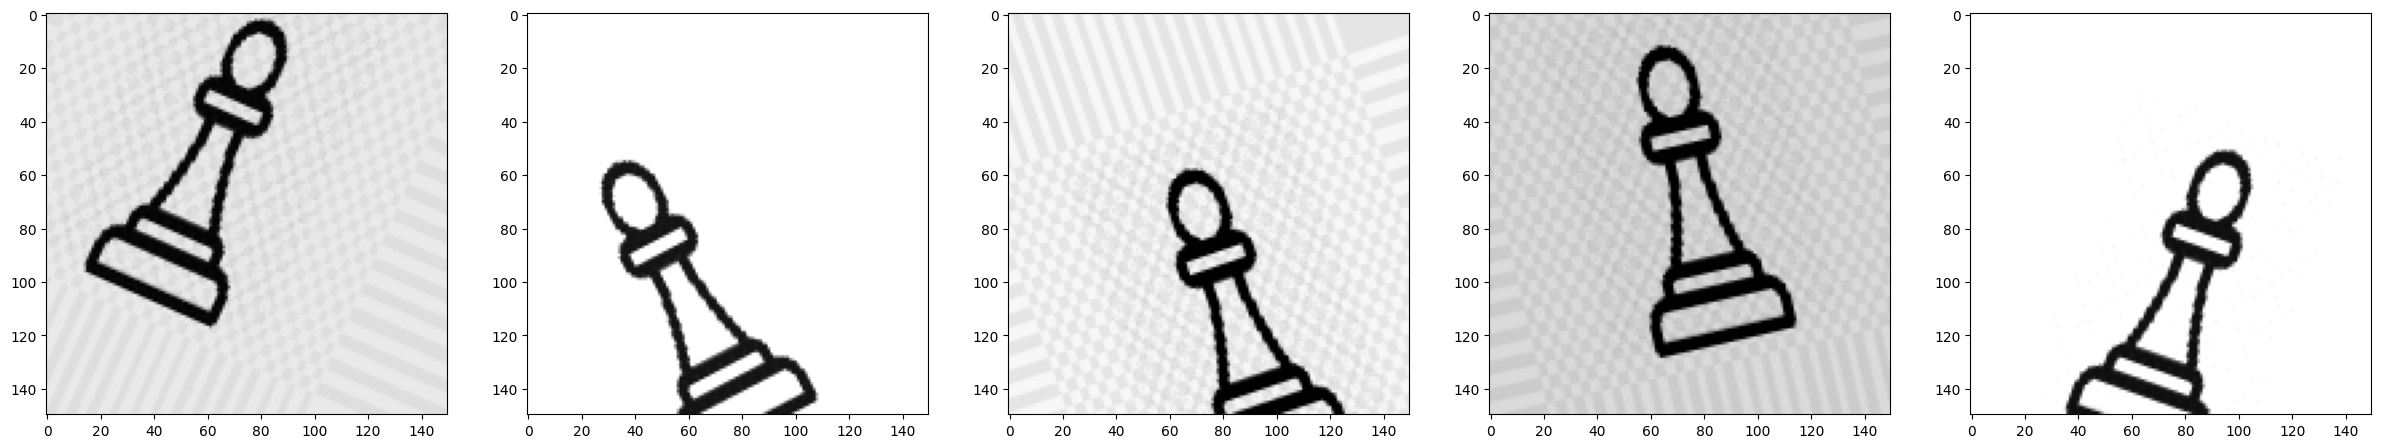

In [ ]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 1,
							class_mode ='categorical',
							)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 5, figsize=(30, 8))

for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0])

With the following code we take 8 images and we modify them 1 time.

Found 382 images belonging to 6 classes.
Found 51 images belonging to 6 classes.
(32, 200, 200, 3)
[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]


<Figure size 640x480 with 0 Axes>

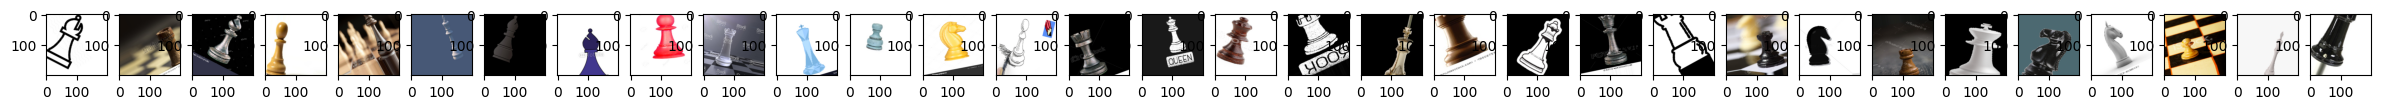

In [11]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (200, 200),
							batch_size = 32,
							class_mode ='categorical',
							)

validation_generator = validation_datagen.flow_from_directory(
		 validation_dir,
		 target_size= (200,200),
		 batch_size = 32,
		 class_mode = 'categorical',
)

images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]) :
  axarr[i].imshow(images[i])

We set up a way in which we can store our augmented images in the hard disk. Modify parameters at will for better results.

In [ ]:
path = "/content/drive/MyDrive/Machine Learning/Datasets/Chess Data Set/Chessman-image-dataset/Chess"

train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 8,
							class_mode ='categorical',
							save_to_dir= path + '/augmented',
              save_prefix='aug',
              save_format='png'
							)

Found 382 images belonging to 6 classes.


# Model Implenetation
The following code demonstrates the implementation of a CNN (convolutional neural network), taking as base the framework used in This [Plant Classification Model](https://dl.acm.org/doi/10.1145/3372938.3372974), alongside other parameters for the classification of our chess pieces.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Initialize the model
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional Layer 4
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional Layer 5
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(1024, activation='relu'))

# Fully Connected Layer 2
model.add(Dense(512, activation='relu'))

# Fully Connected Layer 3 (Output Layer)
model.add(Dense(6, activation='softmax'))  # Assuming 6 classes for chess pieces

# Display the model's architecture
model.summary()

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 196, 196, 32)      2432      
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 98, 98, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_53 (Conv2D)          (None, 94, 94, 32)        25632     
                                                                 
 max_pooling2d_41 (MaxPooli  (None, 47, 47, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_54 (Conv2D)          (None, 43, 43, 64)        51264     
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 21, 21, 64)      

# VGG16 Transfer Training
Knowing that VGG16 is a popular and simple to implement classification model, we implement a transfer Training to our model for better results.



In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

# Load the pre-trained VGG16 model
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

# Freeze the weights of the VGG16 base
vgg16_base.trainable = False

# Initialize the model
model = Sequential()
model.add(vgg16_base)


# Flatten the output
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(1024, activation='relu'))

# Fully Connected Layer 2
model.add(Dense(512, activation='relu'))

# Fully Connected Layer 3 (Output Layer)
model.add(Dense(6, activation='softmax'))  # Assuming 6 classes for chess pieces

# Display the model's architecture
model.summary()

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

# Xception
Xception is another similar CNN Architecture often used for Image Classification. It was tested as one of the best accuracy given models for chess piece recognition in this article.https://arxiv.org/pdf/2012.06858

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import Xception

# Load the pre-trained Xception model without the top layers
xception_base = Xception(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

# Freeze the weights of the Xception base
for layer in xception_base.layers:
    layer.trainable = False

# Initialize the model
model = Sequential()

# Add the Xception base
model.add(xception_base)

# Flatten the output
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(1024, activation='relu'))

# Fully Connected Layer 2
model.add(Dense(512, activation='relu'))

# Fully Connected Layer 3 (Output Layer)
model.add(Dense(6, activation='softmax'))  # Assuming 6 classes for chess pieces

# Display the model's architecture
model.summary()

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_3 (Dense)             (None, 1024)              102761472 
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 124150830 (473.60 MB)
Trainable params: 103289350 (394.02 MB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________


# Fitting and Training the Model
In this code extract, we fit the model and begin the training process.

In [15]:
history = model.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator )

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.9576 - loss: 0.1490 - val_accuracy: 0.7647 - val_loss: 1.0013
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.9530 - loss: 0.1321 - val_accuracy: 0.7843 - val_loss: 0.8428
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.9495 - loss: 0.1326 - val_accuracy: 0.8039 - val_loss: 0.9970
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.9345 - loss: 0.2210 - val_accuracy: 0.8235 - val_loss: 0.7405
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.9723 - loss: 0.0977 - val_accuracy: 0.8039 - val_loss: 0.8786
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.9533 - loss: 0.1155 - val_accuracy: 0.7843 - val_loss: 0.9438
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.9276 - loss: 0.1681 - val_accuracy: 0.8235 - val_loss: 0.9083
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.9742 - loss: 0.0706 - val_accuracy: 0.7843 - v

KeyError: 'acc'

## Plotting Results
The following code snippet plots the result of the given model.

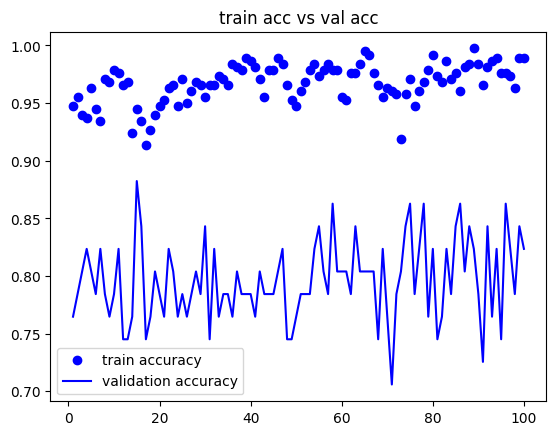

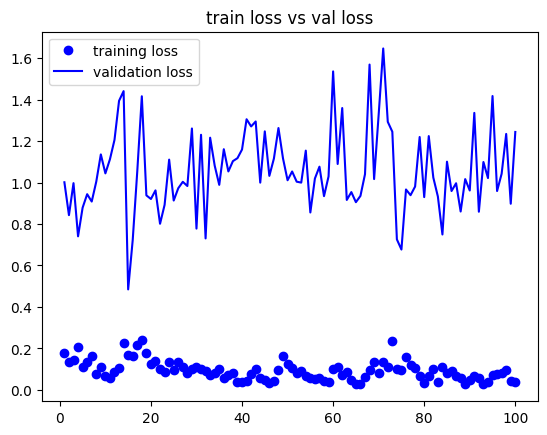

Found 118 images belonging to 6 classes.
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 199ms/step - accuracy: 0.7181 - loss: 79.7950 

test acc :
 0.7118644118309021


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.plot(epochs,val_acc, 'b', label='validation accuracy')
plt.title('train acc vs val acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.plot(epochs,val_loss, 'b', label = 'validation loss')
plt.title('train loss vs val loss')
plt.legend()

plt.show()

test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (200, 200),
					batch_size = 20,
					class_mode= 'categorical')

test_loss, test_acc = model.evaluate(test_generator, steps = 25)
print('\ntest acc :\n', test_acc)

Found 118 images belonging to 6 classes.


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 939ms/step


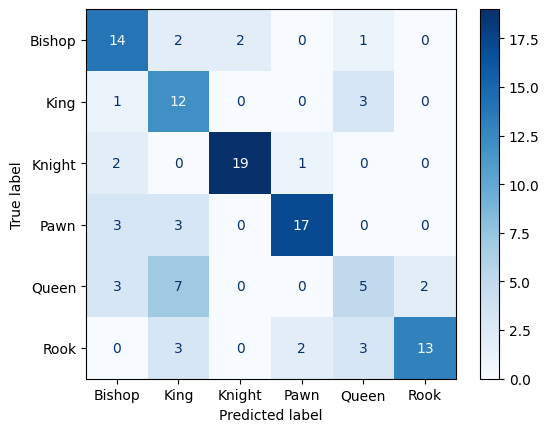

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),  # Make sure this matches the input size of Xception
    batch_size=20,
    class_mode='categorical',
    shuffle=False  # Important to keep the order of images
)

# Get the true labels
true_labels = test_generator.classes

# Get the class indices
class_indices = list(test_generator.class_indices.keys())

# Predict the labels
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
predicted_labels = np.argmax(predictions, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_indices)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [25]:
model.save("VGG16Model.keras")

## Query to Model
We query the model with newly given images.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Predicted class: rook with confidence 0.98


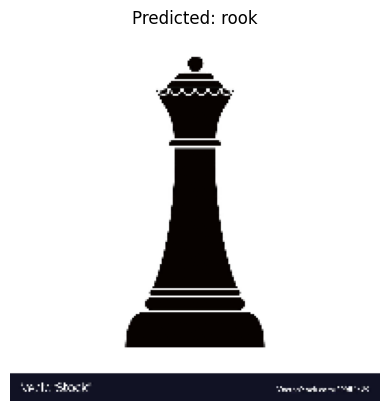

In [35]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Path to the test image
test_imgKnight = '/KnightTest.jpg'
test_imgKing = '/KingTest.jpg'
img_pathKnight = 'C:/Users/Alex/Documents/Cisco Config/Algorithms/Machine Learning/Machine-Learning-Project-TC3002B/ImagesFromWeb' + test_imgKnight
img_pathKing = 'C:/Users/Alex/Documents/Cisco Config/Algorithms/Machine Learning/Machine-Learning-Project-TC3002B/ImagesFromWeb' + test_imgKing
img_pathQueen = 'C:/Users/Alex/Documents/Cisco Config/Algorithms/Machine Learning/Machine-Learning-Project-TC3002B/ImagesFromWeb/QueenTest.jpg'

# Load and preprocess the image
img = image.load_img(img_pathQueen, target_size=(200, 200))  # Use the target size expected by the model
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.0

# Model prediction
confidence = model.predict(img_tensor)
predicted_class = np.argmax(confidence, axis=1)[0]

# Map the predicted class to the actual class name
class_names = ['bishop', 'king', 'knight', 'pawn', 'queen', 'rook']  # Adjust these based on your classes
predicted_class_name = class_names[predicted_class]

# Output the result
print(f"Predicted class: {predicted_class_name} with confidence {confidence[0][predicted_class]:.2f}")

# Display the image
plt.imshow(img_tensor[0])
plt.title(f"Predicted: {predicted_class_name}")
plt.axis('off')
plt.show()
